# Logistic Regression for Digit Classification

### 1

In [51]:
import numpy as np
import pandas as pd
from sklearn.metrics import log_loss
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt 
from sklearn.metrics import confusion_matrix
from matplotlib import cm

%matplotlib inline
plt.style.use('seaborn')

In [2]:
x_train = pd.read_csv('x_train.csv')
x_test = pd.read_csv('x_test.csv')
y_train = pd.read_csv('y_train.csv')
y_test = pd.read_csv('y_test.csv')

In [3]:
x_train

,pixel000,pixel001,pixel002,pixel003,pixel004,pixel005,pixel006,pixel007,pixel008,pixel009,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
3,0,0,0,0,0,0,0,1,0,1,...,0.0,1.0,0.0,1.0,0.0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11795,0,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0,0,1,1,0
11796,0,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,1.0,0.0,0,0,0,0,1
11797,0,0,0,0,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0
11798,0,0,0,0,0,0,0,0,0,1,...,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0


In [45]:
iters = np.arange(1,41)
accuracy_list = []
loss_list = []
coef_list = []

for i in iters:
    lr_clf = LogisticRegression(max_iter=i,solver='liblinear')
    lr_clf.fit(x_train, y_train)
    accuracy_list.append(lr_clf.score(x_train,y_train))
    y_predict = lr_clf.predict(x_train)
    loss_list.append(log_loss(y_train, y_predict))
    coef_list.append(lr_clf.coef_[0][0])

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\svm\_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), f

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\c

Text(0, 0.5, 'Accuracy')

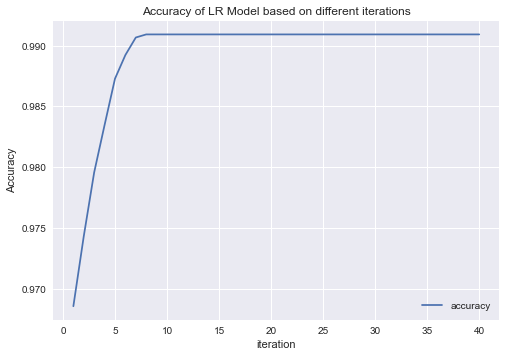

In [59]:
plt.plot(iters, accuracy_list, label='accuracy')
plt.legend()
plt.title("Accuracy of LR Model based on different iterations")
plt.xlabel("iteration")
plt.ylabel("Accuracy")

Text(0, 0.5, 'Log_Loss')

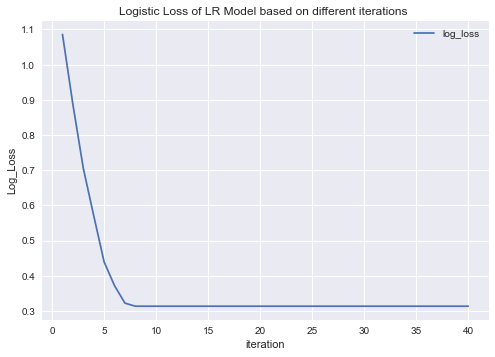

In [58]:
plt.plot(iters, loss_list, label='log_loss')
plt.legend()
plt.title("Logistic Loss of LR Model based on different iterations ")
plt.xlabel("iteration")
plt.ylabel("Log_Loss")

### 2

Text(0, 0.5, 'Weight of pixel000')

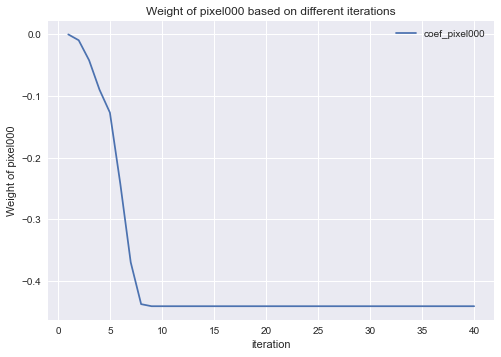

In [60]:
plt.plot(iters, coef_list, label='coef_pixel000')
plt.legend()
plt.title("Weight of pixel000 based on different iterations")
plt.xlabel("iteration")
plt.ylabel("Weight of pixel000")

### 3

In [61]:
C_grid = np.logspace(-9, 6, 31)
loss_list2 = []
accuracy_list2 = []

for c in C_grid:
    lr_clf2 = LogisticRegression(C=c, solver='liblinear').fit(x_train, y_train)
    accuracy_list2.append(lr_clf2.score(x_test,y_test))
    y_predict2 = lr_clf2.predict(x_test)
    loss_list2.append(log_loss(y_test, y_predict2))
    

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
D:\c

In [66]:
min_loss_index = loss_list2.index(min(loss_list2))
max_acc = accuracy_list2[min_loss_index]

print("The minimum log loss is: %.3f " % min(loss_list2))
print("The C value based on least loss is: %.3f" % C_grid[min_loss_index])
print("The accuracy of the model is: %.3f" % max_acc)

The minimum log loss is: 1.115 
The C value based on least loss is: 0.100
The accuracy of the model is: 0.968


In [68]:
lr_clf_min_loss = LogisticRegression(C=C_grid[min_loss_index]).fit(x_train, y_train)
y_predict_min_loss = lr_clf_min_loss.predict(x_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_predict_min_loss).ravel()
print(confusion_matrix(y_test, y_predict_min_loss))
print("confusion_matrix: %.3f " % min(loss_list2))
(tn, fp, fn, tp)

D:\conda\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[[942  32]
 [ 34 975]]


(942, 32, 34, 975)

In [64]:
y_predict_min_loss 
y_test

,is_9
0,1
1,1
2,1
3,1
4,1
...,...
1978,0
1979,0
1980,1
1981,0


### 4 

In [13]:
y_predict_min_loss
y_test1 = y_test.to_numpy()

In [14]:
len(y_test1)

1983

In [15]:
fp_index = []
fn_index = []
for i in range(len(y_test1)):
    if y_predict_min_loss[i]==1 and y_test1[i]==0:
        fp_index.append(i)
    elif y_predict_min_loss[i]==0 and y_test1[i]==1:
        fn_index.append(i)

In [16]:
fp_samples = x_test.iloc[fp_index[:9]]
fn_samples = x_test.iloc[fn_index[:9]]

In [17]:
fp_samples.iloc[1]

pixel000    0.0
pixel001    0.0
pixel002    0.0
pixel003    0.0
pixel004    0.0
           ... 
pixel779    0.0
pixel780    0.0
pixel781    0.0
pixel782    0.0
pixel783    0.0
Name: 69, Length: 784, dtype: float64

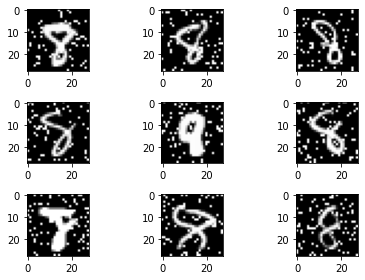

In [38]:
fig = plt.figure()
axes = []

for i in range(0,9):
    axes.append(fig.add_subplot(3,3,i+1))
#     subplot_title=("false positive image"+str(i+1))
#     axes[-1].set_title(subplot_title)
    plt.imshow(X_train.iloc[i].to_numpy().reshape(28,28), cmap=plt.cm.gray, vmin=0.0, vmax=1.0)

fig.tight_layout()
plt.show()

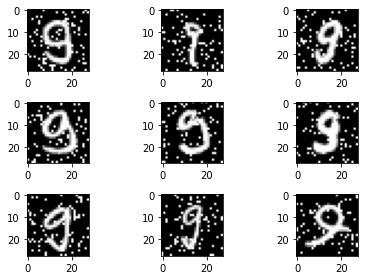

In [41]:
fig = plt.figure()
axes = []

for i in range(0,9):
    axes.append(fig.add_subplot(3,3,i+1))
    plt.imshow(fn_samples.iloc[i].to_numpy().reshape(28,28), cmap=plt.cm.gray, vmin=0.0, vmax=1.0)

fig.tight_layout()    
plt.show()

### 5

In [26]:
re = lr_clf_min_loss.coef_.reshape(28,28)

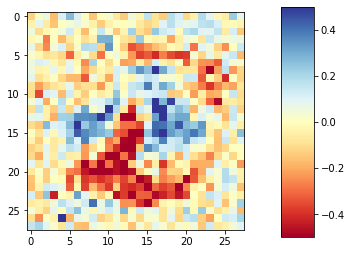

In [30]:
plt.imshow(re, cmap=plt.cm.RdYlBu, vmin=-0.5, vmax=0.5)
cax = plt.axes([0.85, 0.1, 0.075, 0.8])
plt.colorbar(cax=cax)